---
title: ApproxFun
venue: Modules
---

## Approximation of functions via Chebyshev Polynomials and B-Splines in Julia

The Julia-package [ApproxFun package](https://juliaapproximation.github.io/ApproxFun.jl/latest/) implements Chebyshev polynomials(default) and other basis functions to approximate arbitrary functions.

In [1]:
import ApproxFun as af

Define Chebychev polynomials explicitly over their natural interval by specifying coefficients:

In [2]:
#Fully explicit construction for the first three Chebyshev polynomials over [-1,1]
chebf1 = af.Fun(
    af.Chebyshev(af.Interval(-1,1)),
    [1,0,0])
chebf2 = af.Fun(
    af.Chebyshev(af.Interval(-1,1)),
    [0,1,0])
chebf3 = af.Fun(
    af.Chebyshev(af.Interval(-1,1)),
    [0,0,1]);

<b> ApproxFun </b> uses the natural interval [-1,1] as default for Chebyshev polynomials, so no need to specify them explicitly:

In [3]:
# Easy construction for the first 4 Chebyshev polynomials by using default constructor
chebf1_ = af.Fun(af.Chebyshev(), [1,0,0,0])
chebf2_ = af.Fun(af.Chebyshev(), [0,1,0,0])
chebf3_ = af.Fun(af.Chebyshev(), [0,0,1,0])
chebf4_ = af.Fun(af.Chebyshev(), [0,0,0,1]);

Visualizing the first 4 Chebyshev polynomials $y(x)=1, x,2x^2-1, 4x^3-3x$

In [4]:
import PlotlyLight as plt
plt.preset.template.plotly_dark!()

# Define the interval for plotting
x = range(-1, 1, step=0.05)

# Plot the results
p = plt.plot(
    x = x,
    y = chebf1_.(x),
    type = "scatter",
    mode = "lines",
    name = "T0"
).plot(
    x = x,
    y = chebf2_.(x),
    type = "scatter",
    mode = "lines",
    name = "T1"
).plot(
    x = x,
    y = chebf3_.(x),
    type = "scatter",
    mode = "lines",
    name = "T2"
).plot(
    x = x,
    y = chebf4_.(x),
    type = "scatter",
    mode = "lines",
    name = "T3"
)

p.layout.title.text = "First 4 Chebyshev polynomials over interval [-1, 1]"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "y"
p.layout.yaxis.type = "linear"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], :y => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], :mode => "lines", :name => "T0"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], :y => [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], :mode => "lines", :name => "T1"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], :y => [1.0, 0.8049999999999998, 0.6200000000000001, 0.44499999999999995, 0.28000000000000014, 0.125, -0.020000000000000125, -0.15499999999999994, -0.28, -0.3949999999999999  …  -0.3949999999999999, -0.28, -0.15499999999999994, -0.020000000000000125, 0.125, 0.28000000000000014, 0.44499999999999995, 0.6200000000000001, 0.8049999999999998, 1.0], :mode => "lines", :name => "T2"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55  …  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], :y => [-1.0, -0.5794999999999999, -0.2160000000000002, 0.09350000000000008, 0.3519999999999998, 0.5625, 0.7280000000000001, 0.8514999999999999, 0.936, 0.9844999999999999  …  -0.9844999999999999, -0.936, -0.8514999999999999, -0.7280000000000001, -0.5625, -0.3519999999999998, -0.09350000000000008, 0.2160000000000002, 0.5794999999999999, 1.0], :mode => "lines", :name => "T3")], EasyConfig.Config(:title => EasyConfig.Config(:text => "First 4 Chebyshev polynomials over interval [-1, 1]", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"), :type => "linear")), EasyConfig.Config())

Define Chebyshe polymomials over domains other than [-1,1]:

In [5]:
interv = af.Interval(2, 6)
chebf1 = af.Fun(af.Chebyshev(interv), [1,0,0])
chebf2 = af.Fun(af.Chebyshev(interv), [0,1,0])
chebf3 = af.Fun(af.Chebyshev(interv), [0,0,1]);

In [6]:
# Define the interval for plotting
x = range(2, 6, step=0.01)

# Plot the results
p = plt.plot(
    x = x,
    y = chebf1.(x),
    type = "scatter",
    mode = "lines",
    name = "T0"
).plot(
    x = x,
    y = chebf2.(x),
    type = "scatter",
    mode = "lines",
    name = "T1"
).plot(
    x = x,
    y = chebf3.(x),
    type = "scatter",
    mode = "lines",
    name = "T2"
)

p.layout.title.text = "First 3 Chebyshev polynomials over interval [2, 6]"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "y"
p.layout.yaxis.type = "linear"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09  …  5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 6.0], :y => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], :mode => "lines", :name => "T0"), EasyConfig.Config(:type => "scatter", :x => [2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09  …  5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 6.0], :y => [-1.0, -0.9950000000000001, -0.99, -0.9850000000000001, -0.98, -0.9750000000000001, -0.97, -0.9650000000000001, -0.96, -0.9550000000000001  …  0.9550000000000001, 0.96, 0.9649999999999999, 0.9700000000000002, 0.9750000000000001, 0.98, 0.9849999999999999, 0.9900000000000002, 0.9950000000000001, 1.0], :mode => "lines", :name => "T1"), EasyConfig.Config(:type => "scatter", :x => [2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09  …  5.91, 5.92, 5.93, 5.94, 5.95, 5.96, 5.97, 5.98, 5.99, 6.0], :y => [1.0, 0.9800500000000004, 0.9601999999999999, 0.9404500000000003, 0.9208, 0.9012500000000003, 0.8817999999999999, 0.8624500000000003, 0.8431999999999998, 0.8240500000000003  …  0.8240500000000003, 0.8431999999999998, 0.8624499999999995, 0.8818000000000008, 0.9012500000000003, 0.9208, 0.9404499999999996, 0.9602000000000008, 0.9800500000000004, 1.0], :mode => "lines", :name => "T2")], EasyConfig.Config(:title => EasyConfig.Config(:text => "First 3 Chebyshev polynomials over interval [2, 6]", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"), :type => "linear")), EasyConfig.Config())

<b>Explicit calculation of Chebyshev expansion coefficients</b>

Chebyshev polynomials $T_n(x)$ form a complete orthogonal basis for the space $C^1([-1,1]) $ of all continously differentiable functions over $[-1,1]$ with respect to the scalar product 
\begin{equation}
<f,g>:=\int_{-1}^1  f(x)\cdot g(x)\frac{1}{\sqrt{1-x^2}} \ dx
\end{equation}

Hence the expansion coefficients for an arbitrary function $f \in C^1([-1,1])$ can be determined as follows:

\begin{equation}
f(x)=a_0 T_0(x)+a_1 T_1(x)+ \dots + a_n T_n(x), \ \ \ a_n = \int_{-1}^1  f(x)\cdot T_n(x)\frac{1}{\sqrt{1-x^2}} \ dx
\end{equation}

If $N$ total interpolation points are given where the values for $f(x)$ are specified, then the highest order of Chebyshev expansion is $N-1$. For example, having one single point would only define the expansion coefficient for $T_0(x)=1$.

<b> Example: </b> $f(x)=e^x, $ let's interpolate $f$ with $N=1,2,3$ points to check the accuracy of Chebyshev approximations with increasing number of nodes and polynomial order.

In [7]:
unit = af.Interval(-1, 1) # define unit interval
ChebS = af.Chebyshev(unit); # define function space

# Add left and right endpoints to interior Chebyshev points 
function add_cheb_endp(p)
 append!(prepend!(p, 1), -1)
end

f(x) = exp(x) # define function


p1 = af.points(ChebS, 1) # one single Chebyshev node point 
p2 = af.points(ChebS, 2) # two points
p3 = af.points(ChebS, 3) # three points
p4 = af.points(ChebS, 4) # four points

#p2_= add_cheb_endp(p2)
#p3_= add_cheb_endp(p3)
#p4_= add_cheb_endp(p4)

# Evaluate function on different Chebyshev grid points
v1 = f.(p1)
v2 = f.(p2)
v3 = f.(p3)
v4 = f.(p4)

# Approximate via Chebyshev polynomials with increasing order
f_1 = af.Fun(ChebS, af.transform(ChebS,v1))
f_2 = af.Fun(ChebS, af.transform(ChebS,v2))
f_3 = af.Fun(ChebS, af.transform(ChebS,v3))
f_4 = af.Fun(ChebS, af.transform(ChebS,v4))

# Define the interval for plotting
x = range(-1, 1, step=0.1)

# Plot the results
p = plt.plot(
    x = x,
    y = f.(x),
    type = "scatter",
    mode = "lines",
    name = "Exact"
).plot(
    x = x,
    y = f_1.(x),
    type = "scatter",
    mode = "lines",
    name = "0 Degree"
).plot(
    x = x,
    y = f_2.(x),
    type = "scatter",
    mode = "lines",
    name = "1 Degree"
).plot(
    x = x,
    y = f_3.(x),
    type = "scatter",
    mode = "lines",
    name = "2 Degree"
).plot(
    x = x,
    y = f_4.(x),
    type = "scatter",
    mode = "lines",
    name = "3 Degree"
).scatter(
    x = p1,
    y = v1,
    type = "scatter",
    mode = "markers",
    name = "1 Chebyshev Point",
    marker = Dict(:color => "red", :size => 8, :symbol => "cross")
).scatter(
    x = p2,
    y = v2,
    type = "scatter",
    mode = "markers",
    name = "2 Chebyshev Points",
    marker = Dict(:color => "green", :size => 8, :symbol => "cross")
).scatter(
    x = p3,
    y = v3,
    type = "scatter",
    mode = "markers",
    name = "3 Chebyshev Points",
    marker = Dict(:color => "purple", :size => 8, :symbol => "cross")
).scatter(
    x = p4,
    y = v4,
    type = "scatter",
    mode = "markers",
    name = "4 Chebyshev Points",
    marker = Dict(:color => "orange", :size => 8, :symbol => "cross")
)

p.layout.title.text = "Comparision of Different Number of Chebyshev Node Points"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "y"
p.layout.yaxis.type = "linear"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [0.36787944117144233, 0.4065696597405991, 0.44932896411722156, 0.4965853037914095, 0.5488116360940265, 0.6065306597126334, 0.6703200460356393, 0.7408182206817179, 0.8187307530779818, 0.9048374180359595  …  1.1051709180756477, 1.2214027581601699, 1.3498588075760032, 1.4918246976412703, 1.6487212707001282, 1.8221188003905089, 2.0137527074704766, 2.225540928492468, 2.45960311115695, 2.718281828459045], :mode => "lines", :name => "Exact"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], :mode => "lines", :name => "0 Degree"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [0.17515019524874909, 0.28369435937600973, 0.39223852350327043, 0.5007826876305312, 0.6093268517577919, 0.7178710158850525, 0.8264151800123132, 0.9349593441395739, 1.0435035082668347, 1.1520476723940953  …  1.3691360006486166, 1.4776801647758773, 1.5862243289031381, 1.6947684930303988, 1.8033126571576594, 1.9118568212849203, 2.0204009854121807, 2.1289451495394416, 2.237489313666702, 2.346033477793963], :mode => "lines", :name => "1 Degree"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [0.4022697175985732, 0.41415898376129917, 0.43668908594122874, 0.4698600241383622, 0.5136717983526993, 0.5681244085842401, 0.6332178548329847, 0.7089521370989329, 0.7953272553820848, 0.8923432096824406  …  1.118297626334763, 1.24723608868673, 1.3868153870559008, 1.537035521442275, 1.697896491845853, 1.8693982982666348, 2.05154094070462, 2.2443244191598097, 2.4477487336322024, 2.6618138841217993], :mode => "lines", :name => "2 Degree"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [0.3634071181765155, 0.40762191662994546, 0.4532352420712456, 0.5012981486646997, 0.552861690574591, 0.6089769219652029, 0.670694897000819, 0.7390666698457228, 0.8151432946641974, 0.8999758256205267  …  1.100112822603882, 1.2175193969594753, 1.3478860941100568, 1.4922639682199101, 1.6517040734533184, 1.8272574639745656, 2.0199751939479342, 2.230908317537709, 2.461107888908172, 2.711624962223608], :mode => "lines", :name => "3 Degree"), EasyConfig.Config(:type => "scatter", :x => [0.0], :y => [1.0], :mode => "markers", :name => "1 Chebyshev Point", :marker => EasyConfig.Config(:color => "red", :symbol => "cross", :size => 8)), EasyConfig.Config(:type => "scatter", :x => [0.7071067811865475, -0.7071067811865475], :y => [2.028114981647472, 0.49306869139523984], :mode => "markers", :name => "2 Chebyshev Points", :marker => EasyConfig.Config(:color => "green", :symbol => "cross", :size => 8)), EasyConfig.Config(:type => "scatter", :x => [0.8660254037844386, 0.0, -0.8660254037844386], :y => [2.3774426752361646, 1.0, 0.4206200260541148], :mode => "markers", :name => "3 Chebyshev Points", :marker => EasyConfig.Config(:color => "purple", :symbol => "cross", :size => 8)), EasyConfig.Config(:type => "scatter", :x => [0.9238795325112867, 0.3826834323650898, -0.3826834323650898, -0.9238795325112867], :y => [2.5190441714069842, 1.4662138007571095, 0.682028773350537, 0.39697596864348], :mode => "markers", :name => "4 Chebyshev Points", :marker => EasyConfig.Config(:color => "orange", :symbol => "cross", :size => 8))], EasyConfig.Config(:title => EasyConfig.Config(:text => "Comparision of Different Number of Chebyshev Node Points", :x => 0.5), :xaxis => Eas

Compute the maximal error between Chebyshev approximation and exact function among all interplated points:

In [8]:
#returns both maximal error and its location in x
err = findmax(abs.(f_4.(x) - f.(x)));

print("The maximal error between Chebyshev approximation with four points and exact curve among all ", length(x), 
    " interpolated points is ",  err[1], " and is assumed at the point x = ", x[err[2]])

The maximal error between Chebyshev approximation with four points and exact curve among all 21 interpolated points is 0.006656866235437153 and is assumed at the point x = 1.0

We can just let the ApproxFun package compute the approximation automatically to within machine accuracy:

In [9]:
# [-1,1] is the default interval if nothing is specified
f_approx = af.Fun(exp, af.Chebyshev())

Fun(Chebyshev(), [1.26607, 1.13032, 0.271495, 0.0443368, 0.00547424, 0.000542926, 4.49773e-5, 3.19844e-6, 1.99212e-7, 1.10368e-8, 5.5059e-10, 2.49796e-11, 1.03911e-12, 3.99368e-14])

In [10]:
# Specify interval of function
f_approx = af.Fun(exp, af.Chebyshev(af.Interval(1, 4)))

Fun(Chebyshev(1 .. 4), [20.0612, 23.9183, 8.23134, 1.96806, 0.359095, 0.0528857, 0.00652419, 0.000692122, 6.43865e-5, 5.33239e-6, 3.97903e-7, 2.7015e-8, 1.68239e-9, 9.67629e-11, 5.17125e-12, 2.60148e-13, 1.50729e-14])

In [11]:
# Define the intervals for plotting
x = range(-1, 1, step=0.1)
x_ = range(1, 1.5, step=0.1)

f(x) = exp(x) # define function
f_approx = af.Fun(exp, af.Chebyshev(af.Interval(-1, 1.5))) # define approximation

# Plot the results
p = plt.plot(
    x = x,
    y = f.(x),
    type = "scatter",
    mode = "lines",
    name = "Exact"
).plot(
    x = x,
    y = f_approx.(x),
    type = "scatter",
    mode = "lines+markers",
    name = "Approximation"
)

p.layout.title.text = "Approximation of exp(x) with Chebyshev Polynomials"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "y"
p.layout.yaxis.type = "linear"

display(p)


PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [0.36787944117144233, 0.4065696597405991, 0.44932896411722156, 0.4965853037914095, 0.5488116360940265, 0.6065306597126334, 0.6703200460356393, 0.7408182206817179, 0.8187307530779818, 0.9048374180359595  …  1.1051709180756477, 1.2214027581601699, 1.3498588075760032, 1.4918246976412703, 1.6487212707001282, 1.8221188003905089, 2.0137527074704766, 2.225540928492468, 2.45960311115695, 2.718281828459045], :mode => "lines", :name => "Exact"), EasyConfig.Config(:type => "scatter", :x => [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1  …  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], :y => [0.3678794411714421, 0.40656965974059894, 0.44932896411722156, 0.49658530379140925, 0.5488116360940263, 0.6065306597126333, 0.6703200460356392, 0.7408182206817178, 0.8187307530779817, 0.9048374180359596  …  1.1051709180756477, 1.2214027581601699, 1.3498588075760032, 1.4918246976412706, 1.6487212707001282, 1.8221188003905089, 2.013752707470476, 2.2255409284924674, 2.4596031111569494, 2.7182818284590455], :mode => "lines+markers", :name => "Approximation")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation of exp(x) with Chebyshev Polynomials", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"), :type => "linear")), EasyConfig.Config())

# Piecewise Interpolation via B-Splines

The julia package for B-Splines can be obtained here: [](https://docs.juliahub.com/BSplines/4pIhL/0.2.3/)

In [12]:
import BSplines as bs

Constructing basis with given order and interval:

In [13]:
margin = 0.1e-9
startp = -3 - margin
endp = 3 + margin

Npoints = 4
h = (endp - startp) / (Npoints + 1)
spline_points = range(startp, endp, step=h)
spline_order = 3
spline_basis = bs.BSplineBasis(spline_order, spline_points)

7-element BSplines.BSplineBasis{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}:
 order: 3
 breakpoints: -3.0000000001:1.20000000004:3.0000000001

Plot all spline basis functions:

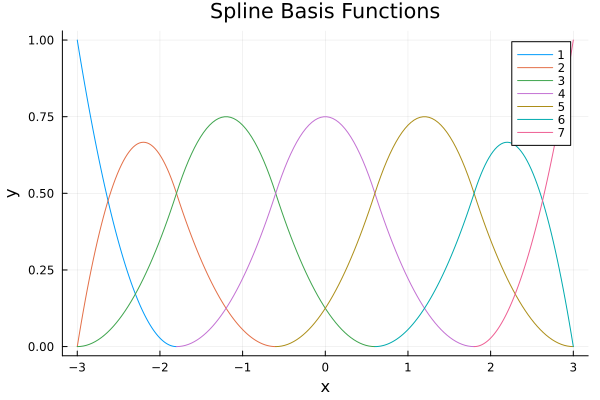

In [14]:
import Plots

# Plot the results
Plots.plot(spline_basis,
    title="Spline Basis Functions",
    xlabel="x", ylabel="y")

Approximate any given function:

In [15]:
f_sin(x) = cos(x^2)
spl_approx = bs.approximate(f_sin, spline_basis)

BSplines.Spline{BSplines.BSplineBasis{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}, Vector{Float64}}:
 basis: 7-element BSplines.BSplineBasis{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}:
  order: 3
  breakpoints: -3.0000000001:1.20000000004:3.0000000001
 coeffs: [-0.91113, 1.82507, -0.373238, 1.45775, -0.373238, 1.82507, -0.91113]

Plot approximation with exact function:

In [16]:
spline_points = range(-3, 3, length=16)
spline_order = length(spline_points) - 1
spline_basis = bs.BSplineBasis(spline_order, spline_points)

spl_approx = bs.approximate(f_sin, spline_basis)

# Define the intervals for plotting
x = range(-3, 3, step=0.01)

# Plot the results
p = plt.plot(
    x = x,
    y = f_sin.(x),
    type = "scatter",
    mode = "lines",
    name = "Exact"
).plot(
    x = x,
    y = spl_approx.(x),
    type = "scatter",
    mode = "lines",
    name = "B-Spline Approx"
).scatter(
    x = spline_points,
    y = f_sin.(spline_points),
    type = "scatter",
    mode = "markers",
    name = "Function at Knots"
)

p.layout.title.text = "Approximation via B-Splines with equidistant knot points"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "y"
p.layout.yaxis.type = "linear"

display(p)


PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [-3.0, -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93, -2.92, -2.91  …  2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0], :y => [-0.9111302618846769, -0.8848250406128249, -0.8554496017114966, -0.8231397531074099, -0.788039784240371, -0.7503017274265742, -0.7100846094093743, -0.6675536965440778, -0.6228797369600898, -0.5762382029297376  …  -0.5762382029297376, -0.6228797369600898, -0.6675536965440778, -0.7100846094093743, -0.7503017274265742, -0.788039784240371, -0.8231397531074099, -0.8554496017114966, -0.8848250406128249, -0.9111302618846769], :mode => "lines", :name => "Exact"), EasyConfig.Config(:type => "scatter", :x => [-3.0, -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93, -2.92, -2.91  …  2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0], :y => [-0.9111302618846769, -0.8848262663047195, -0.8554503797509119, -0.8231396234100371, -0.7880388987899491, -0.7503004742825289, -0.7100833946765666, -0.6675528335517159, -0.6228794050132, -0.5762384483195439  …  -0.5762384483195436, -0.6228794050132004, -0.667552833551716, -0.7100833946765666, -0.750300474282529, -0.7880388987899491, -0.8231396234100371, -0.8554503797509111, -0.8848262663047195, -0.9111302618846769], :mode => "lines", :name => "B-Spline Approx"), EasyConfig.Config(:type => "scatter", :x => [-3.0, -2.6, -2.2, -1.8, -1.4, -1.0, -0.6, -0.2, 0.2, 0.6, 1.0, 1.4, 1.8, 2.2, 2.6, 3.0], :y => [-0.9111302618846769, 0.888461329013091, 0.12726495303305702, -0.9951619033238304, -0.3794517647881543, 0.5403023058681398, 0.9358968236779348, 0.9992001066609779, 0.9992001066609779, 0.9358968236779348, 0.5403023058681398, -0.3794517647881543, -0.9951619033238304, 0.12726495303305702, 0.888461329013091, -0.9111302618846769], :mode => "markers", :name => "Function at Knots")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation via B-Splines with equidistant knot points", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"), :type => "linear")), EasyConfig.Config())

Get maximal approximation error on all interpolated points:

In [17]:
# Returns both maximal error and its location in x
err = findmax(abs.(spl_approx.(x) - f_sin.(x)));

print("The maximal error between B-Spline and exact curve among all ", length(x), 
    " interpolated points is ",  err[1], " and is assumed at the point x = ", x[err[2]])

The maximal error between B-Spline and exact curve among all 601 interpolated points is 3.6528894403337064e-6 and is assumed at the point x = -1.27

# In-class Exercise: Calculate accuracy of polynomial approximations

<b> Your Task: </b> For the function $f(x)=e^x$ on the interval $[-1,1]$, approximate $f(x)$ with Chebyshev polynomials supported on $N=1,2,\dots,10$ internal Chebyshev points. For each $N$, compute the maximal approximation error $\epsilon(N)$ for 1001 equidistant points within $[-1,1]$. Plot $\epsilon(N)$ as a function of $N$. Repeat this for B-Spline approximation, where $N$ now stands for the number of knots. Compare the error function $\epsilon(N)$ for both types of approximations.

<b> Exploration: </b> Repeat the above task for the function $g(x)=\cos(10x^2)$, and compare its approximation error curve with that of $f(x)$. Which function is harder to approximate?

In [22]:
import ApproxFun as af
import BSplines as bs
import PlotlyLight as plt
plt.preset.template.plotly_dark!()

# Set up the spline interval
margin = 0.1e-9
startp = -1 - margin
endp = 1 + margin

# Define the function to evaluate
f(x) = exp(x)

# Number of points
N = 10
N_range = range(1, 10)

# Define the Chebyshev nodes
c_nodes = [af.points(af.Chebyshev(), i) for i in N_range]

# Define the spline nodes
h = [(endp - startp) / (n + 1) for n in N_range]
spline_nodes = [range(startp, endp, step=h_) for h_ in h]

# Approximate the function at the Chebyshev nodes
c_ys = [f.(c_node) for c_node in c_nodes]

# Approximate the function at the spline nodes
spline_order = [n < 3 ? 2 : n - 1 for n in N_range] # dynamically increase spline order
spline_basis = [bs.BSplineBasis(spline_order_, spline_nodes_) for (spline_order_, spline_nodes_) in zip(spline_order, spline_nodes)]

# Approximate the function with Chebyshev polynomials with increasing order
cheby_approx = [af.Fun(af.Chebyshev(), af.transform(af.Chebyshev(), c_y)) for c_y in c_ys]

# Approximate the function using splines
spline_approx = [bs.approximate(f, basis) for basis in spline_basis]

# Define the grid
x = LinRange(-1, 1, 1001)

# Define function to calculate maximal error
exercise_err(f_, x) = findmax(abs.(f_.(x) - f.(x)))[1]

# Calculate the maximal error for each N
exercise_errors_cheby = [exercise_err(f_, x) for f_ in cheby_approx]
exercise_errors_splines = [exercise_err(f_, x) for f_ in spline_approx]

# Plot the results
p = plt.plot(
    x = N_range,
    y = exercise_errors_cheby,
    type = "scatter",
    mode = "lines+markers",
    name = "Chebyshev"
).plot(
    x = N_range,
    y = exercise_errors_splines,
    type = "scatter",
    mode = "lines+markers",
    name = "Spline"
)

p.layout.title.text = "Approximation Error vs. Points (N)"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "N"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], :y => [1.718281828459045, 0.3722483506650822, 0.05646794433724578, 0.006656866235437153, 0.0006396994825510482, 5.179584768333356e-5, 3.6200882660430977e-6, 2.224393229610655e-7, 1.2190071174700279e-8, 6.027094379135178e-10], :mode => "lines+markers", :name => "Chebyshev"), EasyConfig.Config(:type => "scatter", :x => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], :y => [0.21186644086689643, 0.1095479399106627, 0.06661654025629327, 0.001327300249925889, 6.499058814823933e-5, 1.2482613003239607e-6, 3.1807798617222716e-8, 4.151163857102347e-10, 9.231060360548327e-12, 1.3211653993039363e-13], :mode => "lines+markers", :name => "Spline")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation Error vs. Points (N)", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "N"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())

In [21]:
import ApproxFun as af
import PlotlyLight as plt
plt.preset.template.plotly_dark!()

# Set up the spline interval
margin = 0.1e-9
startp = -1 - margin
endp = 1 + margin

# Define the function to evaluate
g(x) = cos(10 * x^2)

# Number of points
N = 10
N_range = range(1, 10)

# Define the Chebyshev nodes
c_nodes = [af.points(af.Chebyshev(), i) for i in N_range]

# Define the spline nodes
h = [(endp - startp) / (n + 1) for n in N_range]
spline_nodes = [range(startp, endp, step=h_) for h_ in h]

# Approximate the function at the Chebyshev nodes
c_ys = [g.(c_node) for c_node in c_nodes]

# Approximate the function at the spline nodes
spline_order = [n < 3 ? 2 : n - 1 for n in N_range] # dynamically increase spline order
spline_basis = [bs.BSplineBasis(spline_order_, spline_nodes_) for (spline_order_, spline_nodes_) in zip(spline_order, spline_nodes)]

# Approximate the function with Chebyshev polynomials with increasing order
cheby_approx = [af.Fun(af.Chebyshev(), af.transform(af.Chebyshev(), c_y)) for c_y in c_ys]

# Approximate the function using splines
spline_approx = [bs.approximate(g, basis) for basis in spline_basis]

# Define the grid
x = LinRange(-1, 1, 1001)

# Define function to calculate maximal error
exercise_err(g_, x) = findmax(abs.(g_.(x) - g.(x)))[1]

# Calculate the maximal error for each N
exercise_errors_cheby = [exercise_err(g_, x) for g_ in cheby_approx]
exercise_errors_splines = [exercise_err(g_, x) for g_ in spline_approx]

# Plot the results
p = plt.plot(
    x = N_range,
    y = exercise_errors_cheby,
    type = "scatter",
    mode = "lines+markers",
    name = "Chebyshev"
).plot(
    x = N_range,
    y = exercise_errors_splines,
    type = "scatter",
    mode = "lines+markers",
    name = "Spline"
)

p.layout.title.text = "Approximation Error vs. Points (N)"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "N"
p.layout.xaxis.type = "linear"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)


PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], :y => [1.9999843611536747, 1.2836465466169003, 1.7300894510069478, 1.4008657189501834, 2.431178279010978, 1.6016531317862341, 1.1325294673224517, 1.038184329593113, 1.0607312251265373, 0.7376597590242022], :mode => "lines+markers", :name => "Chebyshev"), EasyConfig.Config(:type => "scatter", :x => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], :y => [1.464442141001795, 1.4474351817452287, 1.8232379152947318, 1.6088797023219552, 1.0341909794708066, 0.47049789454010765, 0.26073641897566513, 0.04908067598093235, 0.04435044549555667, 0.0017627999536253824], :mode => "lines+markers", :name => "Spline")], EasyConfig.Config(:title => EasyConfig.Config(:text => "Approximation Error vs. Points (N)", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "N"), :type => "linear"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())

$g(x)$ is harder to approximate.